# Loading the python packages

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
!pip install tensorflow
!pip install scikeras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from scikeras.wrappers import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

匯入資料

In [ ]:
pd.read_csv("dataset.csv", encoding="utf-8-sig")

,2330.TW_pred,"('Close', 'NVDA')",TWDCNY=X,USDTWD=X,^TWII,^SOX,^VIX,2330.TW_DT,2330.TW_3DT,2330.TW_6DT,2330.TW_12DT
0,0.025,0.134,0.018,-1.099e-02,4.848e-02,3.974e-02,-0.168,0.034,-0.049,-0.049,-0.088
1,0.024,-0.015,0.002,-9.161e-04,1.892e-02,4.043e-02,-0.060,0.025,0.016,0.000,-0.086
2,0.040,-0.127,-0.001,4.840e-03,8.298e-04,-7.494e-02,-0.035,0.008,0.017,-0.071,-0.116
3,-0.074,-0.020,0.002,4.126e-03,-2.278e-02,-2.921e-03,-0.101,0.040,0.024,0.048,0.000
4,-0.026,-0.027,-0.009,6.173e-03,-7.150e-02,-4.369e-02,0.094,-0.074,-0.025,0.070,-0.081
...,...,...,...,...,...,...,...,...,...,...,...
679,0.014,0.059,-0.007,-6.395e-03,3.299e-03,4.511e-02,-0.184,0.014,0.082,0.073,0.132
680,0.014,0.002,0.006,-6.690e-03,7.730e-03,-9.632e-04,0.061,0.019,0.052,0.105,0.226
681,0.018,0.065,-0.011,9.511e-03,2.096e-02,1.363e-02,0.033,0.027,0.056,0.160,0.312
682,0.004,-0.022,0.002,-4.261e-04,6.633e-03,-1.407e-02,-0.052,0.018,0.041,0.082,0.230


In [ ]:
return_period = 5


Y: TSMC 未來的return

X:

a. NVDA 5 Business Day Returns    
b. USD/TWD 5 Business Day Returns    
c. CNY/TWD 5 Business Day Returns  
d. the Taiwan Weighted Index 5 Business Day Returns  
e. the Philadelphia Semiconductor Index 5 Business Day Returns    
f. VIX 5 Business Day Returns    
g. TSMC 5 Business Day Returns    
h. TSMC 15 Business Day Returns    
i. TSMC 30 Business Day Returns    
j. TSM 60 Business Day Returns

In [ ]:
# Calculate Y with prediction
Y = np.log(stk_data.loc[:, ('Close', '2330.TW')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

# Calculate X1 (for NVDA), ensuring it's a DataFram
X1 = np.log(stk_data.loc[:, ('Close', 'NVDA')]).diff(return_period)
X2 = np.log(ccy_data.loc[:, ('Close', ('TWDCNY=X', 'USDTWD=X'))]).diff(return_period)
X2.columns = X2.columns.droplevel()
X3 = np.log(idx_data.loc[:, ('Close', ('^TWII', '^SOX', '^VIX'))]).diff(return_period)
X3.columns = X3.columns.droplevel()

X4 = pd.concat([np.log(stk_data.loc[:, ('Close', '2330.TW')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['2330.TW_DT', '2330.TW_3DT', '2330.TW_6DT', '2330.TW_12DT']

X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]



In [ ]:
pd.set_option('display.precision', 3)
dataset.describe()

,2330.TW_pred,"(Close, NVDA)",TWDCNY=X,USDTWD=X,^TWII,^SOX,^VIX,2330.TW_DT,2330.TW_3DT,2330.TW_6DT,2330.TW_12DT
count,684.000,684.000,6.840e+02,6.840e+02,684.000,684.000,684.000,684.000,684.000,684.000,684.000
mean,0.002,0.006,-1.698e-04,-1.024e-04,0.001,0.002,-0.006,0.004,0.009,0.017,0.035
std,0.036,0.067,9.027e-03,9.247e-03,0.029,0.039,0.151,0.036,0.059,0.081,0.114
min,-0.148,-0.423,-7.515e-02,-5.742e-02,-0.136,-0.163,-0.447,-0.133,-0.225,-0.250,-0.463
25%,-0.017,-0.029,-4.562e-03,-3.488e-03,-0.011,-0.019,-0.093,-0.016,-0.024,-0.030,-0.034
50%,0.003,0.010,-5.241e-04,1.636e-04,0.004,0.004,-0.018,0.005,0.011,0.022,0.040
75%,0.024,0.044,3.847e-03,3.777e-03,0.018,0.027,0.071,0.024,0.045,0.067,0.107
max,0.190,0.255,5.522e-02,4.142e-02,0.122,0.139,1.141,0.145,0.249,0.333,0.415


# 視覺化

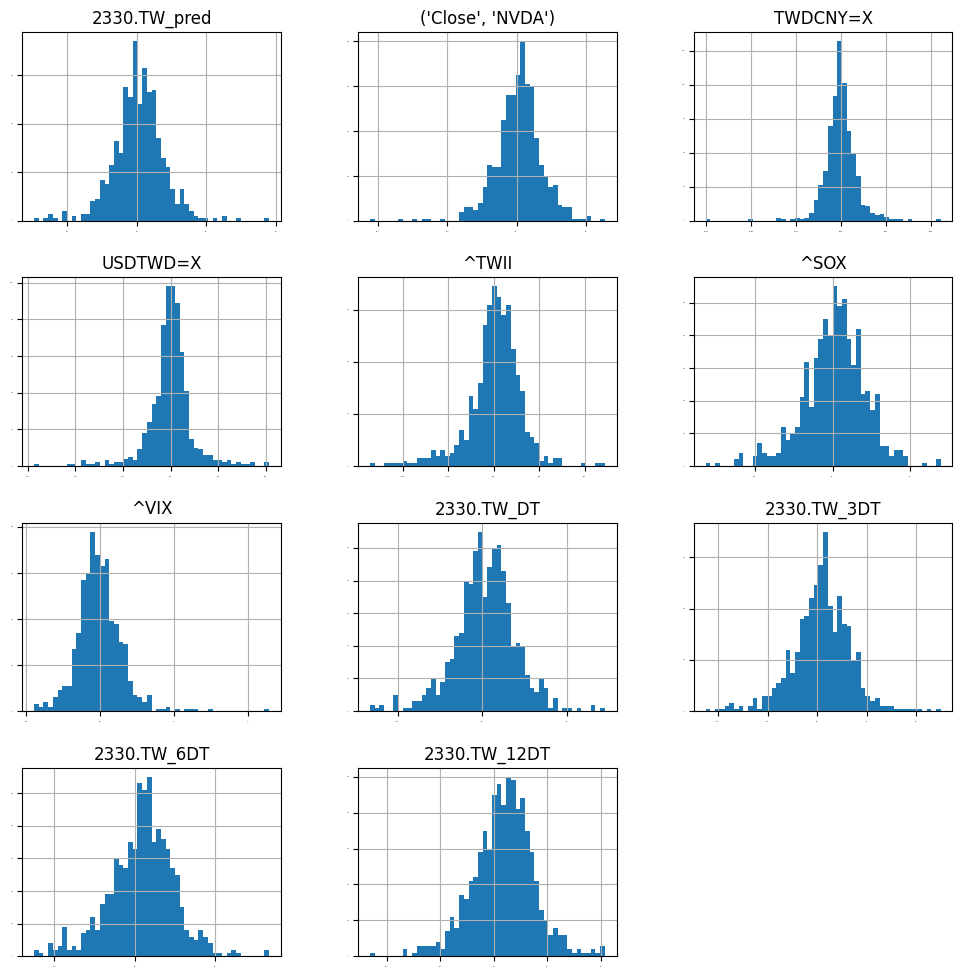

In [ ]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

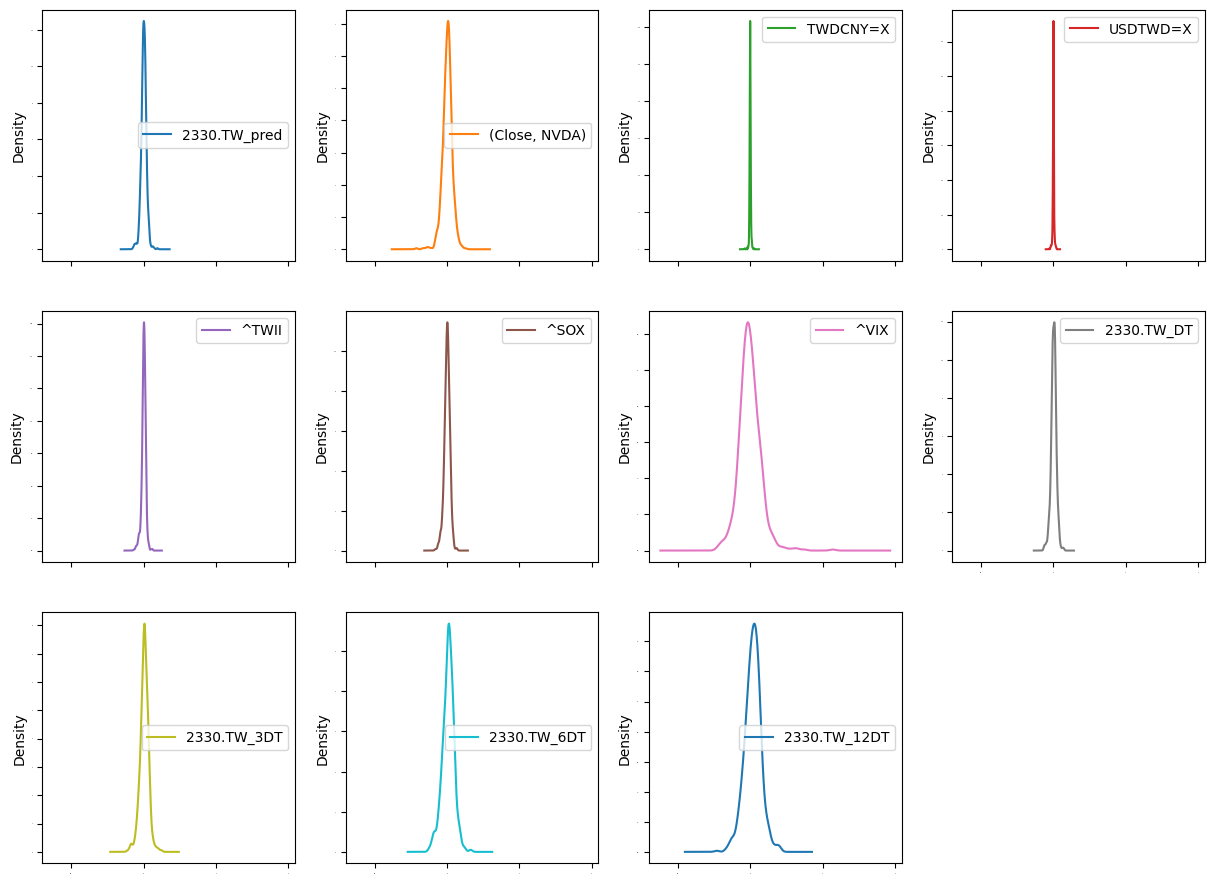

In [ ]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

相關性

<Axes: title={'center': 'Correlation Matrix'}>

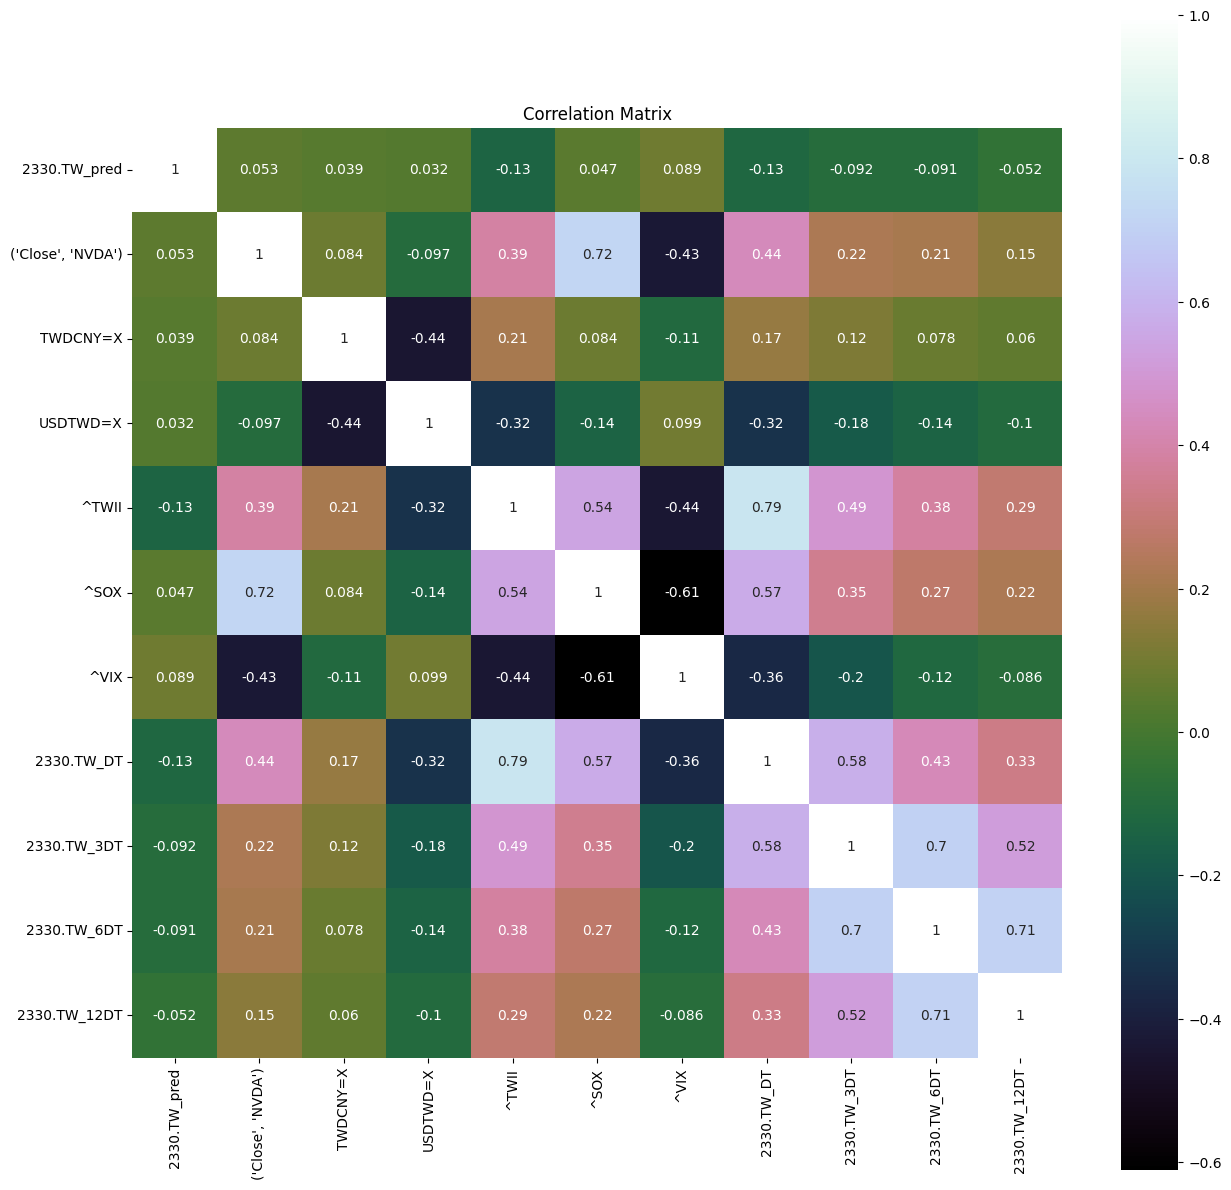

In [ ]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

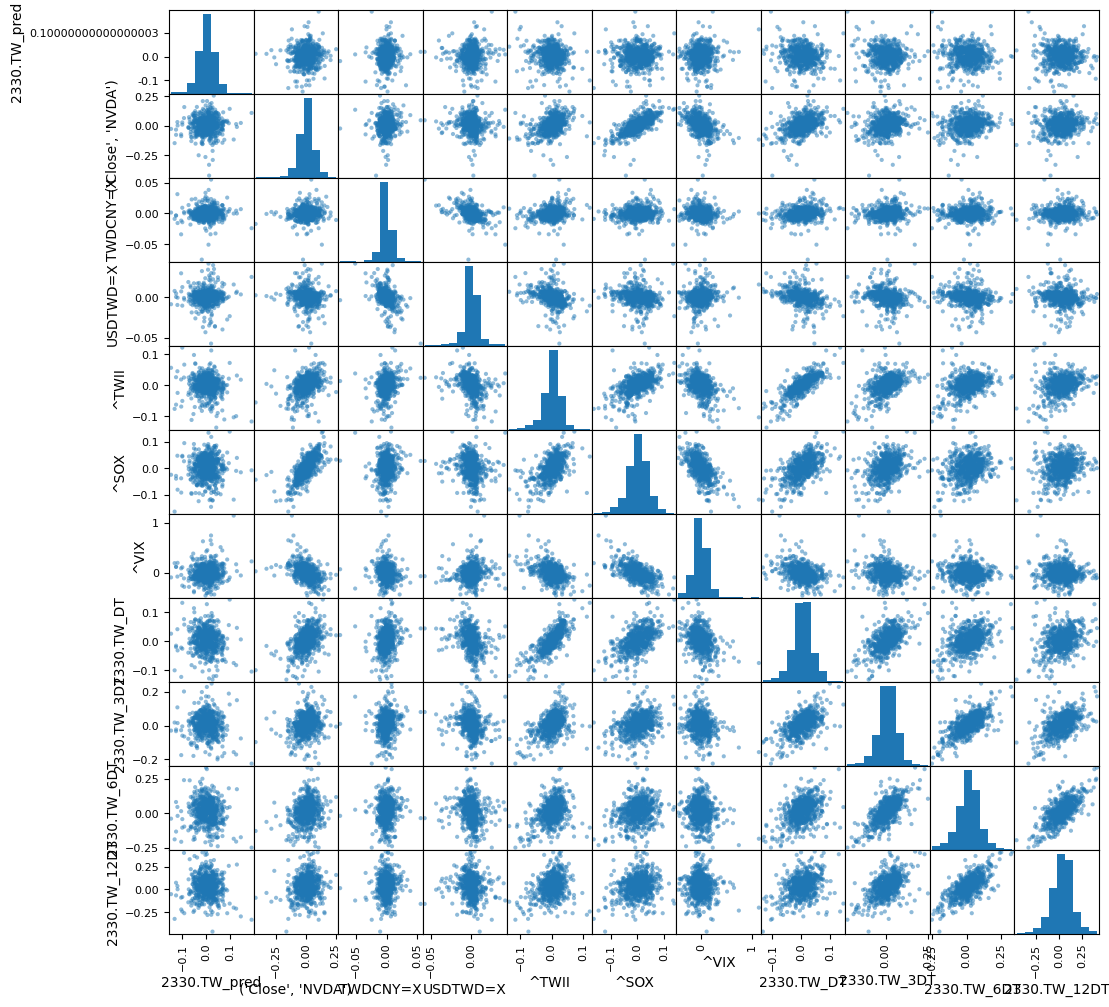

In [ ]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

# 時間序列分析

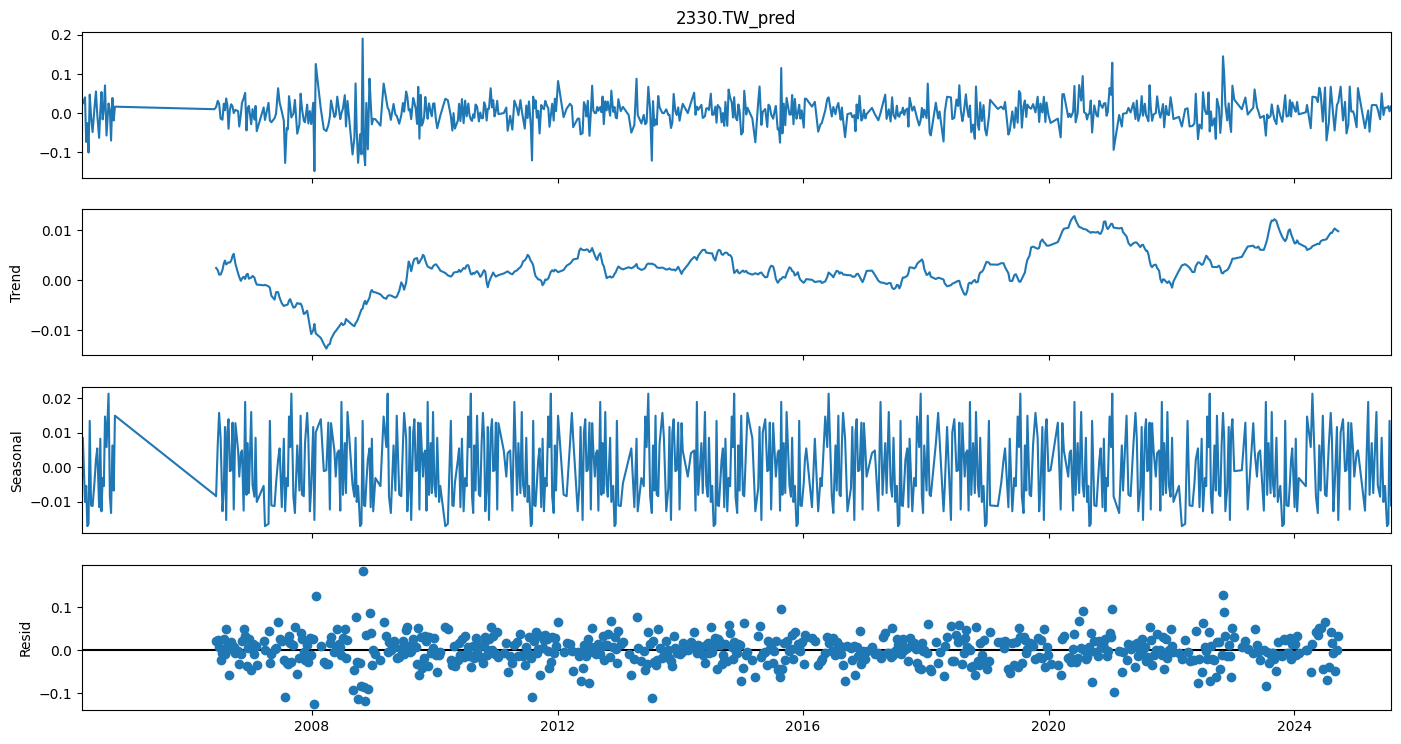

In [ ]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

# 特徵選擇

In [ ]:
# Ensure all feature names are strings
X.columns = X.columns.astype(str)

# Now you can proceed with the feature selection
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)

# Extract the scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate the feature names and their scores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns

# Print the top 10 features
featureScores.nlargest(10, 'Score').set_index('Specs')

,Score
Specs,
^TWII,12.259
2330.TW_DT,10.898
2330.TW_3DT,5.772
2330.TW_6DT,5.743
^VIX,5.418
"('Close', 'NVDA')",1.922
2330.TW_12DT,1.821
^SOX,1.532
TWDCNY=X,1.056


In [ ]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
^TWII,12.259
2330.TW_DT,10.898
2330.TW_3DT,5.772
2330.TW_6DT,5.743
^VIX,5.418
"('Close', 'NVDA')",1.922
2330.TW_12DT,1.821
^SOX,1.532
TWDCNY=X,1.056


分出訓練集與測試集

In [ ]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [ ]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error.
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
models.append(('MLP', MLPRegressor()))

In [ ]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    ## K Fold analysis:

    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)


    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.001297 (0.000378) 0.001231 0.001163
LASSO: 0.001340 (0.000413) 0.001333 0.001203
EN: 0.001340 (0.000413) 0.001333 0.001203
KNN: 0.001614 (0.000413) 0.001047 0.001455
CART: 0.002690 (0.000486) 0.000000 0.003645
SVR: 0.001788 (0.000270) 0.001702 0.001713
MLP: 0.001508 (0.000423) 0.001256 0.001146
ABR: 0.001455 (0.000416) 0.000971 0.001406
GBR: 0.001561 (0.000479) 0.000472 0.001747
RFR: 0.001475 (0.000459) 0.000207 0.001420
ETR: 0.001501 (0.000409) 0.000000 0.001399


# 結果比較

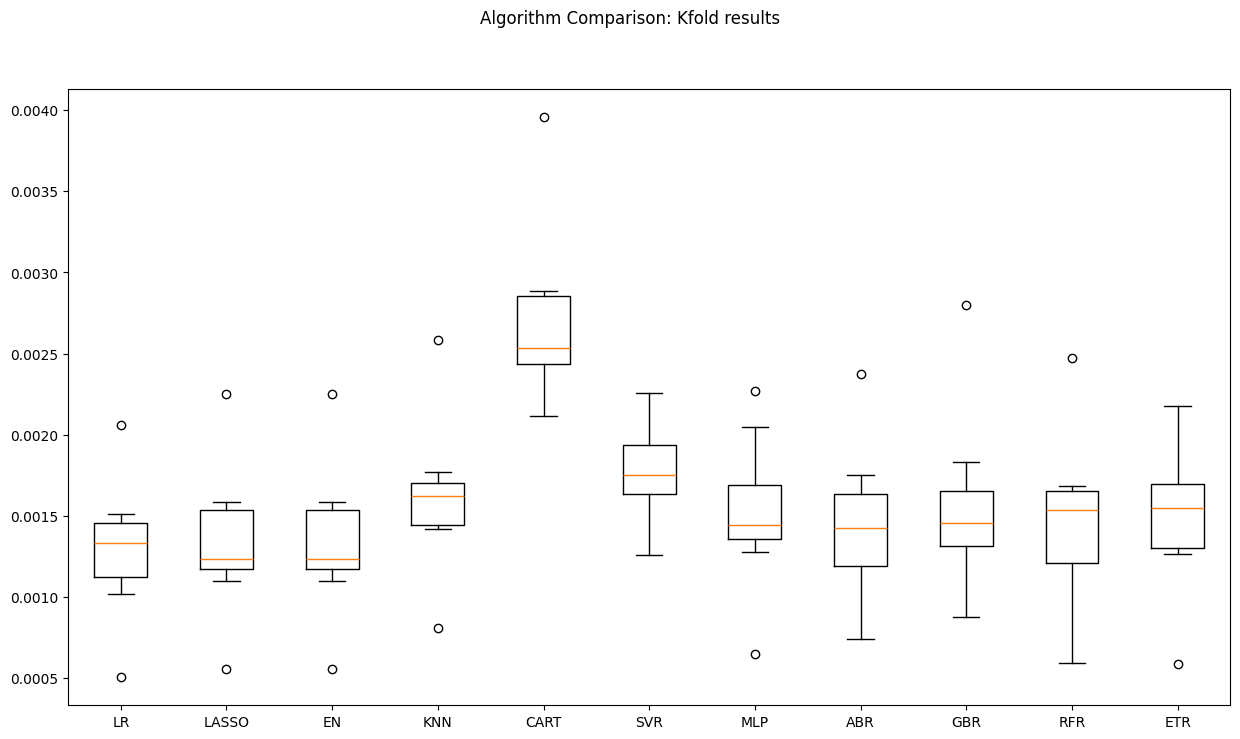

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

In [ ]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA")

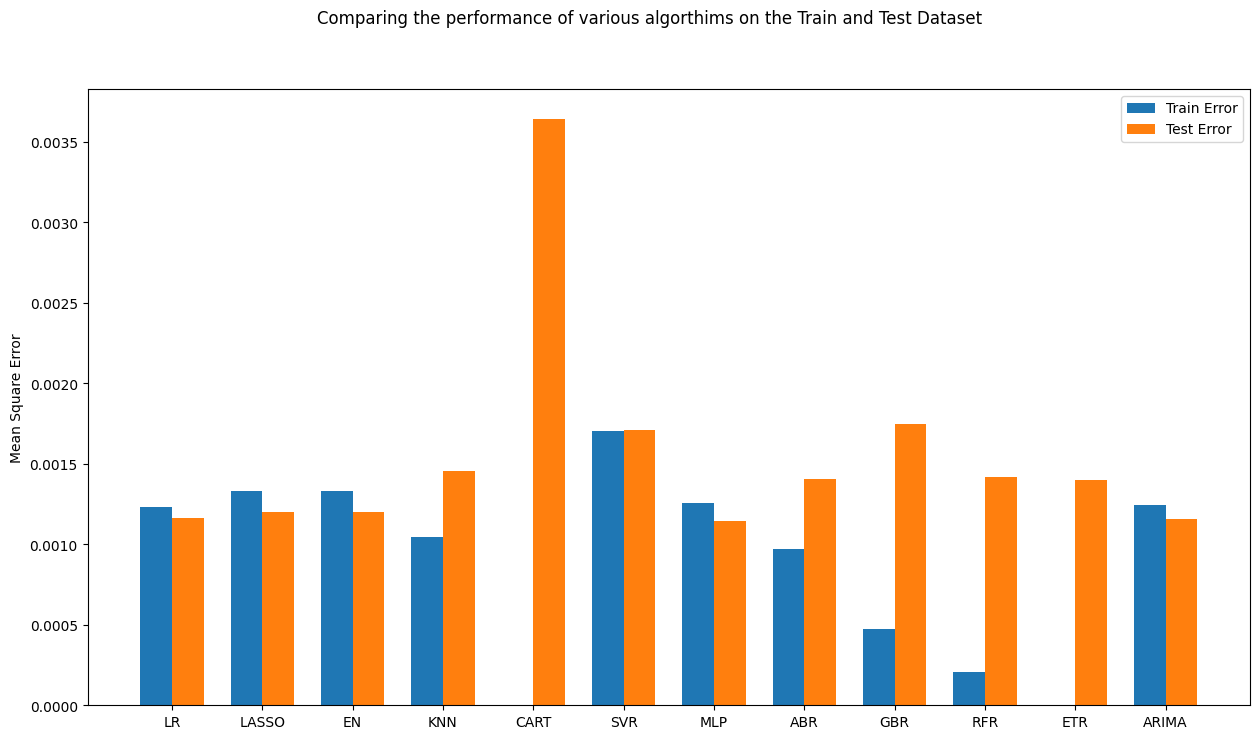

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# Time Series Model - ARIMA Model

In [ ]:
X_train_ARIMA=X_train.loc[:, ["('Close', 'NVDA')", 'TWDCNY=X','USDTWD=X', '^TWII', '^SOX', '^VIX']]
X_test_ARIMA=X_test.loc[:, ["('Close', 'NVDA')", 'TWDCNY=X','USDTWD=X', '^TWII', '^SOX', '^VIX']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [ ]:
print(X_train.columns)

Index(['('Close', 'NVDA')', 'TWDCNY=X', 'USDTWD=X', '^TWII', '^SOX', '^VIX',
       '2330.TW_DT', '2330.TW_3DT', '2330.TW_6DT', '2330.TW_12DT'],
      dtype='object')


In [ ]:
# ARIMA(ARIMAX)
from statsmodels.tsa.arima.model import ARIMA
modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=(1, 0, 0)) #(1,0,0)is an initial guess
model_fit = modelARIMA.fit()

In [ ]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.0011597882290933321

# Model Tuning and Grid Search

In [ ]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 3)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.0012458
ARIMA(0, 0, 1) MSE=0.0012415
ARIMA(0, 1, 0) MSE=0.0023513
ARIMA(0, 1, 1) MSE=0.0012763
ARIMA(0, 2, 0) MSE=0.0064339
ARIMA(0, 2, 1) MSE=0.0024072
ARIMA(1, 0, 0) MSE=0.0012421
ARIMA(1, 0, 1) MSE=0.0012438
ARIMA(1, 1, 0) MSE=0.0019287
ARIMA(1, 1, 1) MSE=0.0013075
ARIMA(1, 2, 0) MSE=0.0041974
ARIMA(1, 2, 1) MSE=0.0020263
ARIMA(2, 0, 0) MSE=0.0012399
ARIMA(2, 0, 1) MSE=0.0012408
ARIMA(2, 1, 0) MSE=0.0017118
ARIMA(2, 1, 1) MSE=0.0013120
ARIMA(2, 2, 0) MSE=0.0031805
ARIMA(2, 2, 1) MSE=0.0017986
Best ARIMA(2, 0, 0) MSE=0.0012399


回測

In [ ]:
# prepare model
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,0])
model_fit_tuned = modelARIMA_tuned.fit()

In [ ]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0011597882290933321


In [ ]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))

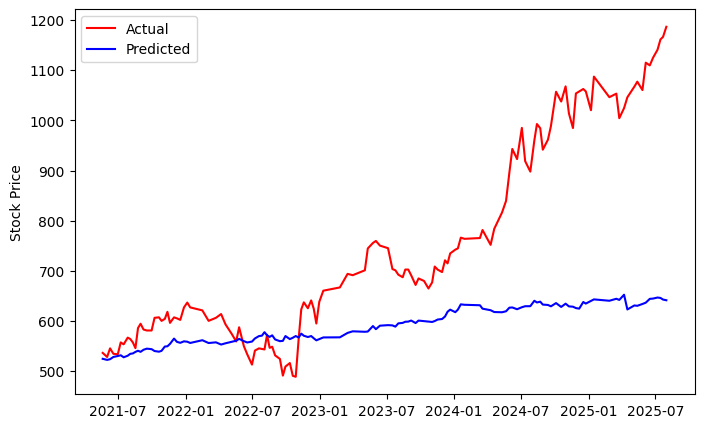

In [ ]:
initial_price = stk_data.loc[Y_test.index[0], ('Close', '2330.TW')]  # Get initial price from stk_data

# Calculate actual prices from returns
actual_prices = initial_price * np.exp(Y_test).cumprod()

# Calculate predicted prices from predicted returns
predicted_tuned.index = Y_test.index
predicted_prices = initial_price * np.exp(predicted_tuned).cumprod()

# Plotting
pyplot.plot(actual_prices, 'r', label='Actual')
pyplot.plot(predicted_prices, 'b', label='Predicted')
pyplot.rcParams["figure.figsize"] = (8, 5)
pyplot.ylabel('Stock Price')  # Update y-axis label
pyplot.legend()
pyplot.show()